# DocAssist: Building Intelligent Medical Decision Support System

## Problem Statement
The objective of this project is to develop an intelligent medical decision support system that analyzes patient data to assist doctors in making informed decisions about the best treatment 
options for individual patients. By leveraging machine learning and data analysis, the system will provide personalized treatment recommendations based on the patient's medical history, 
symptoms, lab results, and other relevant factors.


## Features
- **Patient Data Analysis**: Analyze patient data to identify patterns and correlations.
- **Diagnosis Assistance**: Provide probable diagnoses based on patient symptoms and history.
- **Treatment Recommendations**: Suggest treatment plans tailored to individual patient needs.
- **Predictive Analytics**: Forecast potential health risks and outcomes.

## Benefits
- **Improved Accuracy**: Enhance the accuracy of diagnoses and treatment plans.
- **Time Efficiency**: Reduce the time required for decision-making processes.
- **Personalized Care**: Offer personalized treatment recommendations for better patient outcomes.
- **Data-Driven Insights**: Utilize data-driven insights to support clinical decisions.


| Column Name | Explanation |
|-------------|-------------|
| HAEMATOCRIT | The proportion of blood volume that is occupied by red blood cells. |
| HAEMOGLOBINS | The protein in red blood cells that carries oxygen. |
| ERYTHROCYTE | The number of red blood cells in a given volume of blood. |
| LEUCOCYTE | The number of white blood cells in a given volume of blood. |
| THROMBOCYTE | The number of platelets in a given volume of blood. |
| MCH | Mean Corpuscular Hemoglobin - the average mass of hemoglobin per red blood cell. |
| MCHC | Mean Corpuscular Hemoglobin Concentration - the average concentration of hemoglobin in a given volume of packed red blood cells. |
| MCV | Mean Corpuscular Volume - the average volume of a red blood cell. |
| AGE | The age of the patient. |
| SEX | The sex of the patient (M for male, F for female). |
| SOURCE | The source of the data (1=inpatient or 0=outpatient). |


# Exploratory data analysis

#### importing basic libraries

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier




#### reading the data

In [229]:
df=pd.read_csv(r"C:\Users\ranja\OneDrive\Documents\upgrad\capstone\docassist\data\data(before).csv")
df.head()

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         35.1          11.8         4.65        6.3          310  25.4  33.6   
1         43.5          14.8         5.39       12.7          334  27.5  34.0   
2         33.5          11.3         4.74       13.2          305  23.8  33.7   
3         39.1          13.7         4.98       10.5          366  27.5  35.0   
4         30.9           9.9         4.23       22.1          333  23.4  32.0   

    MCV  AGE SEX SOURCE  
0  75.5    1   F    out  
1  80.7    1   F    out  
2  70.7    1   F    out  
3  78.5    1   F    out  
4  73.0    1   M    out

#### shape of data

In [230]:
df.shape

(4412, 11)

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   4412 non-null   float64
 1   HAEMOGLOBINS  4412 non-null   float64
 2   ERYTHROCYTE   4412 non-null   float64
 3   LEUCOCYTE     4412 non-null   float64
 4   THROMBOCYTE   4412 non-null   int64  
 5   MCH           4412 non-null   float64
 6   MCHC          4412 non-null   float64
 7   MCV           4412 non-null   float64
 8   AGE           4412 non-null   int64  
 9   SEX           4412 non-null   object 
 10  SOURCE        4412 non-null   object 
dtypes: float64(7), int64(2), object(2)
memory usage: 379.3+ KB


In [232]:
df.describe()

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE    LEUCOCYTE  THROMBOCYTE  \
count  4412.000000   4412.000000  4412.000000  4412.000000  4412.000000   
mean     38.197688     12.741727     4.541260     8.718608   257.524479   
std       5.974784      2.079903     0.784091     5.049041   113.972365   
min      13.700000      3.800000     1.480000     1.100000     8.000000   
25%      34.375000     11.400000     4.040000     5.675000   188.000000   
50%      38.600000     12.900000     4.570000     7.600000   256.000000   
75%      42.500000     14.200000     5.050000    10.300000   321.000000   
max      69.000000     18.900000     7.860000    76.600000  1183.000000   

               MCH         MCHC          MCV          AGE  
count  4412.000000  4412.000000  4412.000000  4412.000000  
mean     28.234701    33.343042    84.612942    46.626473  
std       2.672639     1.228664     6.859101    21.731218  
min      14.900000    26.000000    54.000000     1.000000  
25%      27.200000    32.700000    81.500000    29.000000  
50%      28.700000    33.400000    85.400000    47.000000  
75%      29.800000    34.100000    88.700000    64.000000  
max      40.800000    39.000000   115.600000    99.000000

In [233]:
df.isnull().sum()

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

#####  no null values in the data

In [234]:
df.duplicated().sum()

0

##### no duplicate values in data set

In [235]:
df.nunique()

HAEMATOCRIT     326
HAEMOGLOBINS    128
ERYTHROCYTE     433
LEUCOCYTE       276
THROMBOCYTE     554
MCH             189
MCHC            105
MCV             406
AGE              95
SEX               2
SOURCE            2
dtype: int64

### check class distribution

In [236]:
(df['SOURCE'].value_counts())/len(df)*100

SOURCE
out    59.564823
in     40.435177
Name: count, dtype: float64

C:\Users\ranja\AppData\Local\Temp\ipykernel_19788\4162636482.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(x=df['SOURCE'], palette='muted', ax=axes[0])


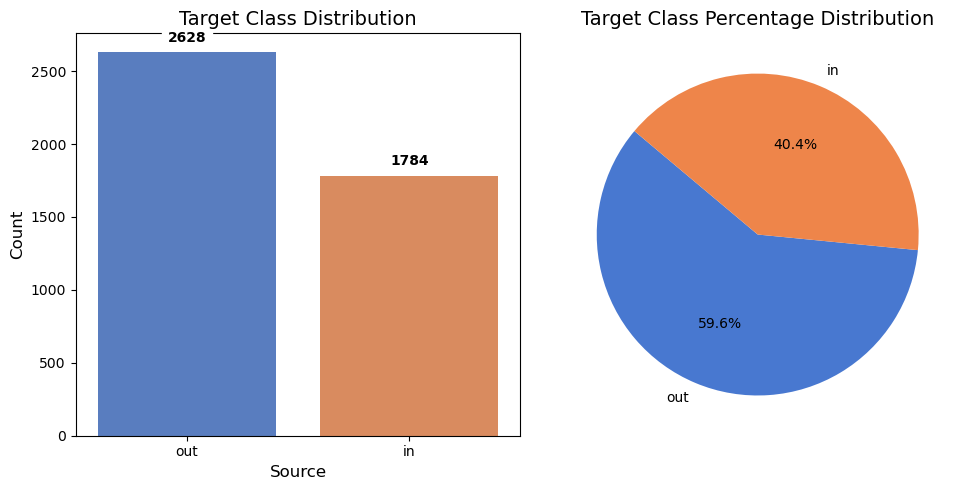

In [237]:


# Calculate percentages for the pie chart
source_counts = df['SOURCE'].value_counts()
source_percentages = source_counts / source_counts.sum() * 100

# Create the subplots with a smaller figure size
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot with annotations
ax1 = sns.countplot(x=df['SOURCE'], palette='muted', ax=axes[0])

# Add the numbers on the bins with increased font size and adjusted position
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() + 5), 
                 ha='center', va='center', xytext=(0, 10), fontsize=10, textcoords='offset points', 
                 color='black', backgroundcolor='white', weight='bold')

# Set the title and labels with increased font size
ax1.set_title('Target Class Distribution', fontsize=14)
ax1.set_xlabel('Source', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)

# Pie chart with percentages
axes[1].pie(source_percentages, labels=source_percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('muted'))
axes[1].set_title('Target Class Percentage Distribution', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


##### there is some class imbalance in the target column with out  59% and in 40% 

C:\Users\ranja\AppData\Local\Temp\ipykernel_19788\710941894.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(x=df['SEX'], palette='muted', ax=axes[0])


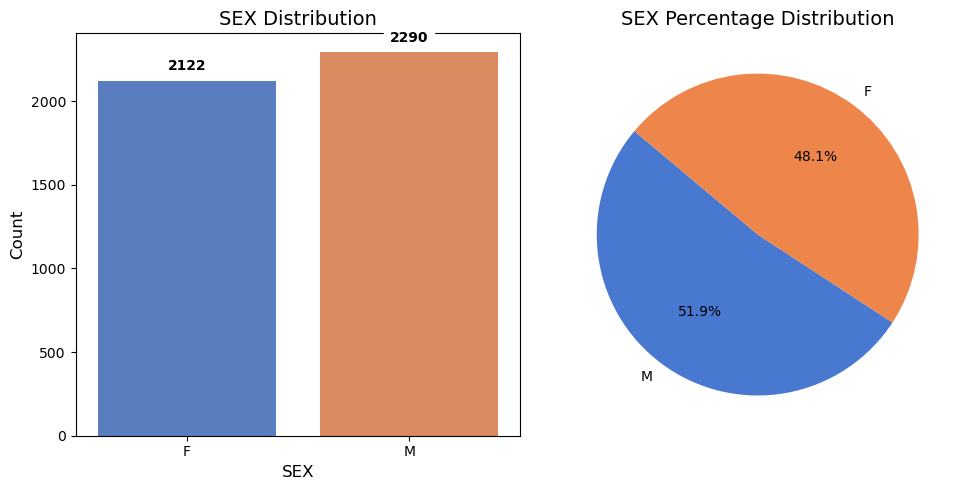

In [238]:

# Calculate percentages for the pie chart
sex_counts = df['SEX'].value_counts()
sex_percentages = sex_counts / sex_counts.sum() * 100

# Create the subplots with a smaller figure size
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot with annotations
ax1 = sns.countplot(x=df['SEX'], palette='muted', ax=axes[0])

# Add the numbers on the bins with increased font size and adjusted position
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() + 5), 
                 ha='center', va='center', xytext=(0, 10), fontsize=10, textcoords='offset points', 
                 color='black', backgroundcolor='white', weight='bold')

# Set the title and labels with increased font size
ax1.set_title('SEX Distribution', fontsize=14)
ax1.set_xlabel('SEX', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)

# Pie chart with percentages
axes[1].pie(sex_percentages, labels=sex_percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('muted'))
axes[1].set_title('SEX Percentage Distribution', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


#### our dataset has equally male and female patients

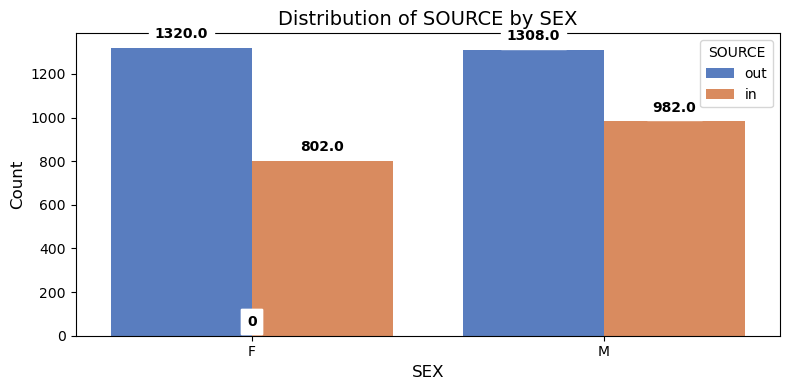

In [239]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='SEX', hue='SOURCE', data=df, palette='muted')

# Add numbers on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), fontsize=10, textcoords='offset points',
                color='black', backgroundcolor='white', weight='bold')

# Set the title and labels with increased font size
plt.title('Distribution of SOURCE by SEX', fontsize=14)
plt.xlabel('SEX', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


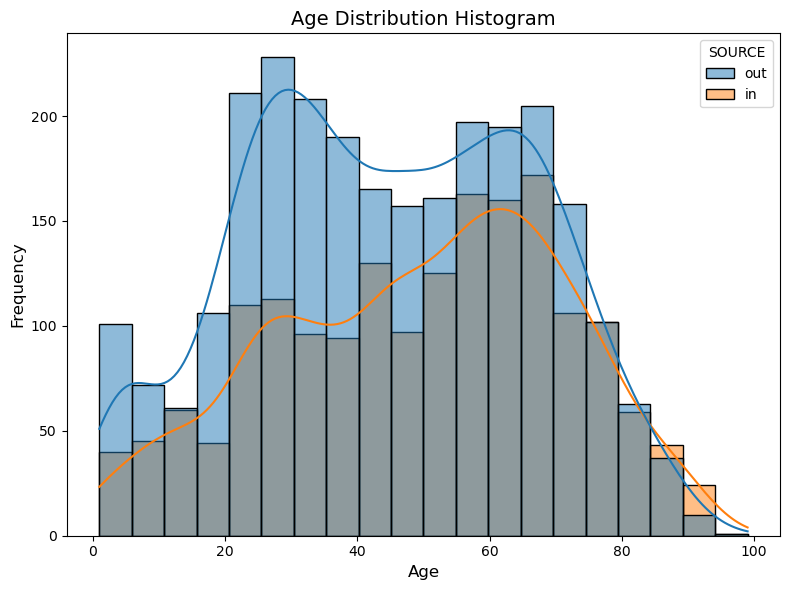

In [240]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the histogram plot
plt.figure(figsize=(8, 6))
sns.histplot(x=df['AGE'], kde=True, bins=20, color='skyblue',hue=df['SOURCE'])

# Set the title and labels with increased font size
plt.title('Age Distribution Histogram', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


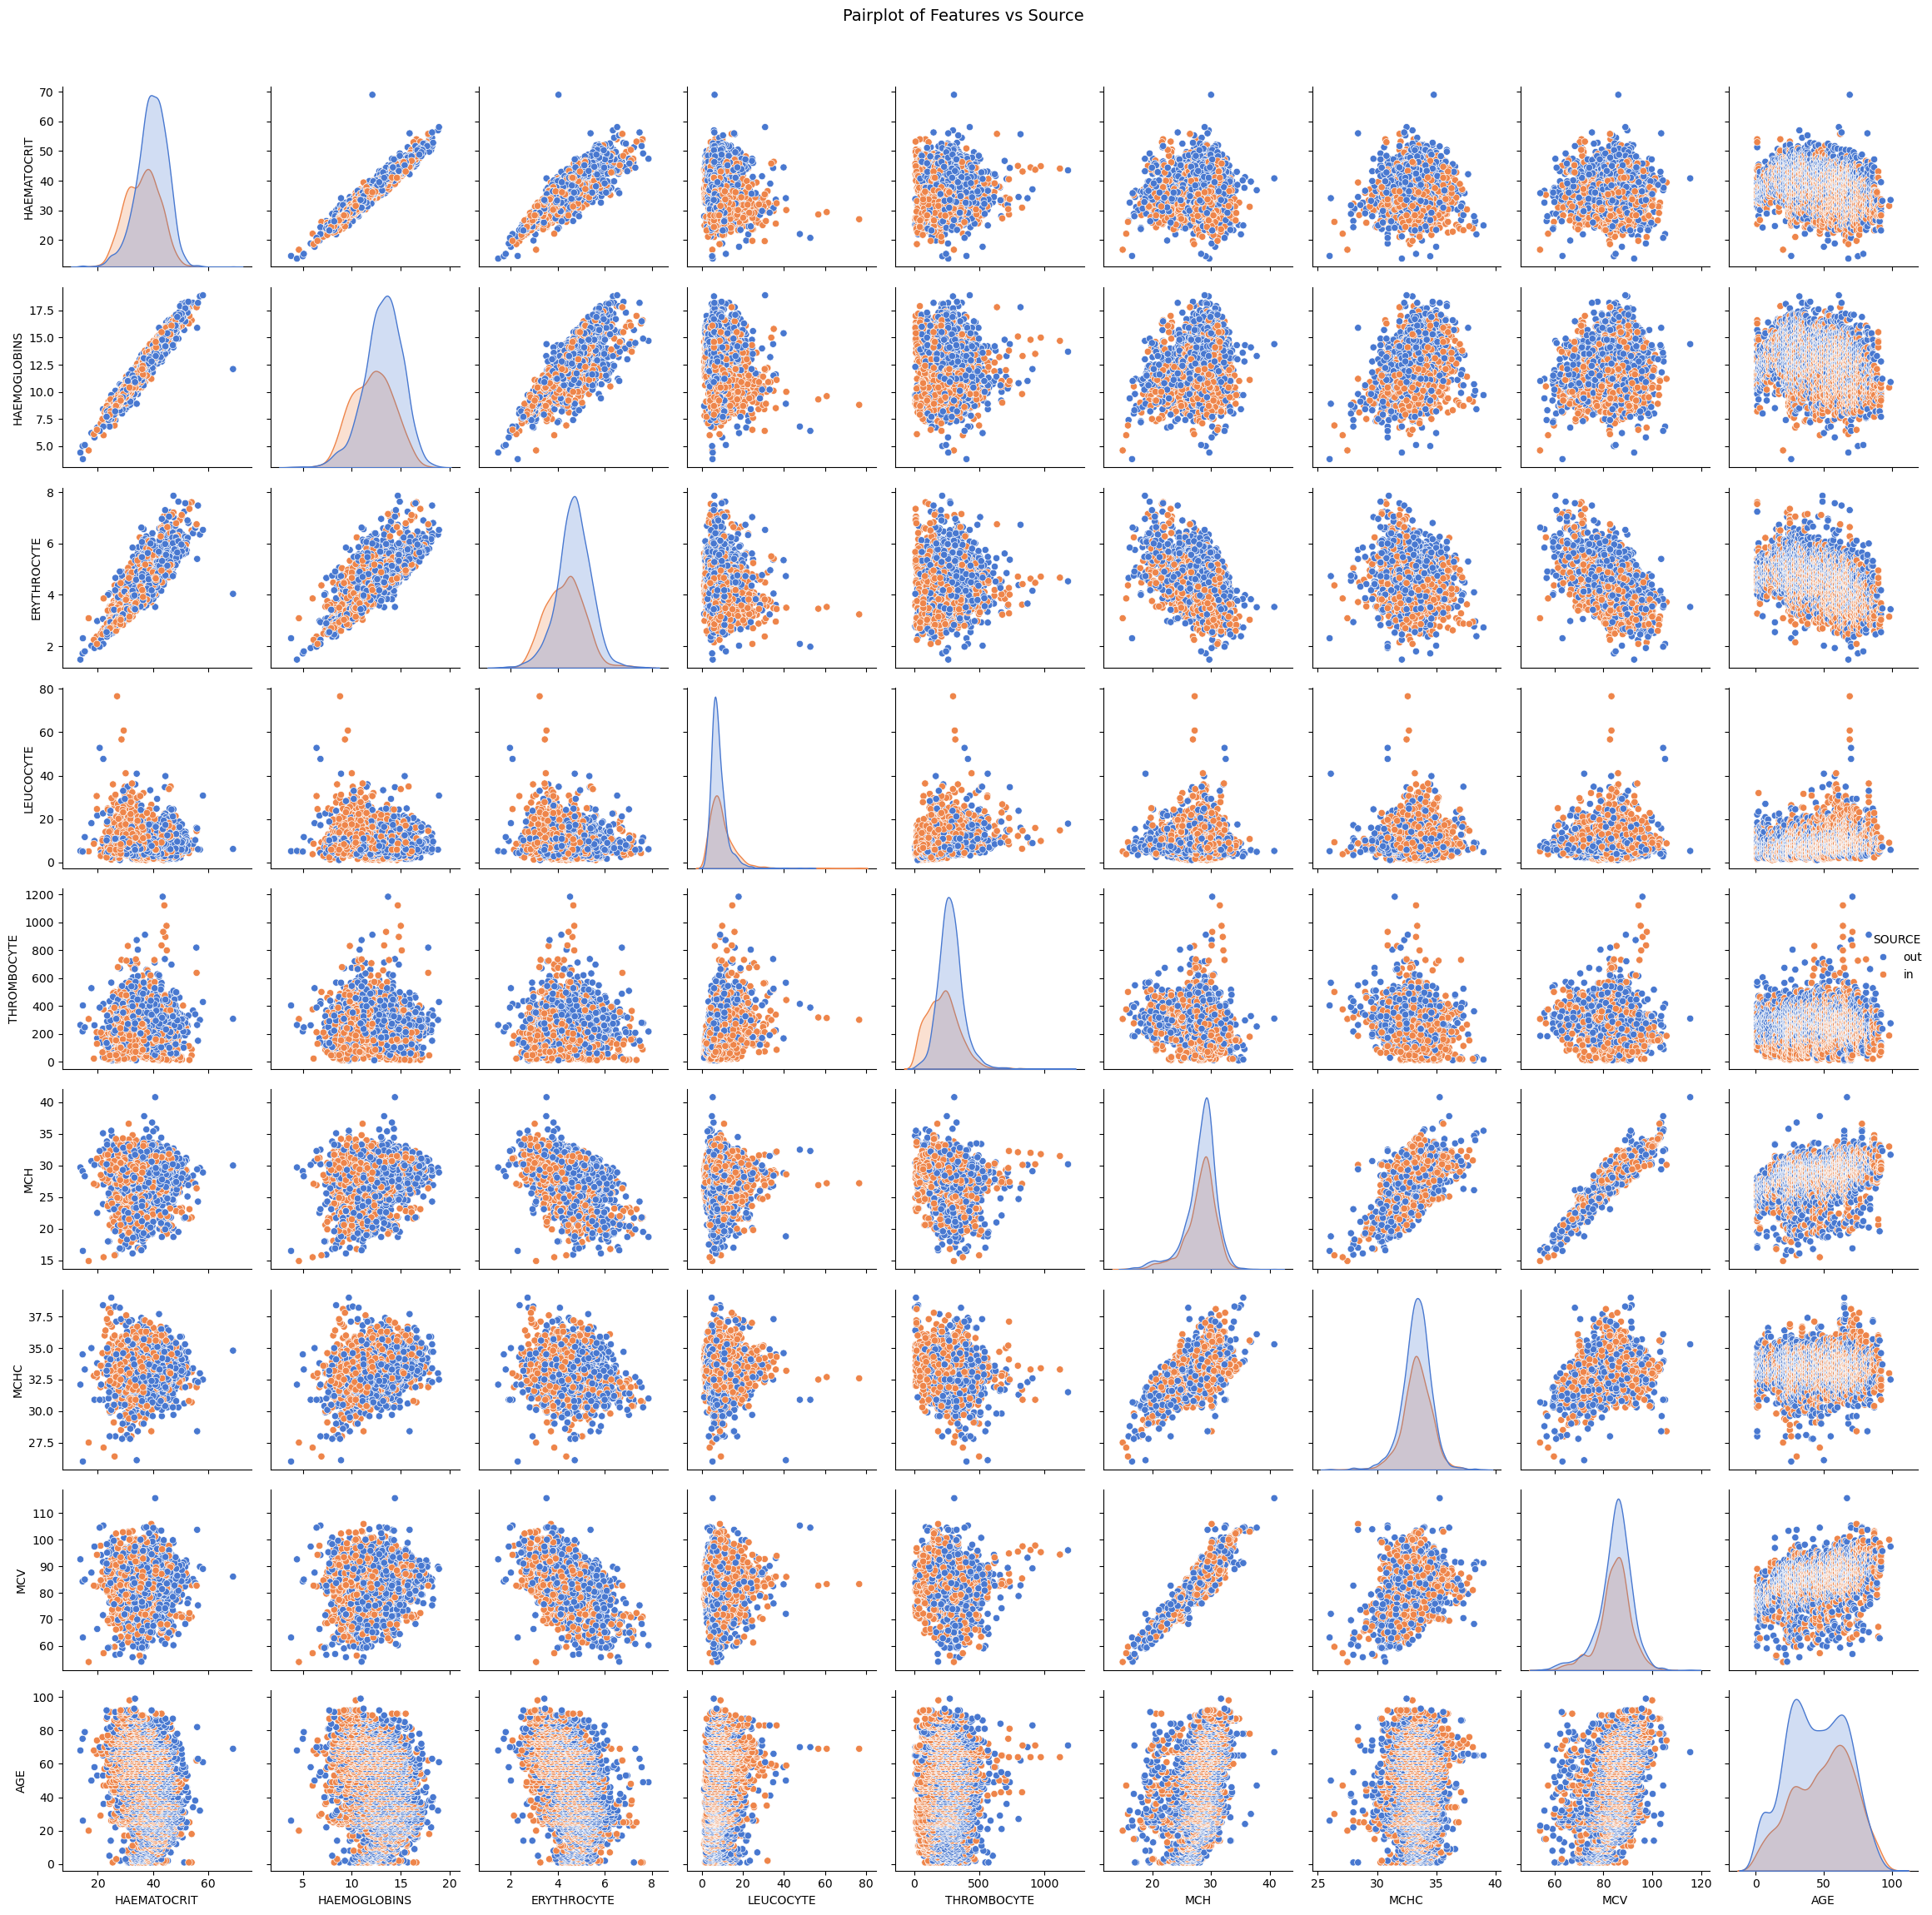

In [241]:


# Create a pairplot
pairplot = sns.pairplot(df, hue='SOURCE', palette='muted')

# Set the title for the entire pairplot
plt.suptitle('Pairplot of Features vs Source', fontsize=14, y=1.02)

# Show the plot
plt.tight_layout()
plt.show()


In [242]:
df.columns

Index(['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
       'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX', 'SOURCE'],
      dtype='object')

In [243]:
import pandas as pd

# List of numerical features you want to check for skewness
numerical_features = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
                      'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE']

# Calculate skewness for each numerical feature
skewness = df[numerical_features].skew()

# Print skewness values
print(skewness)


HAEMATOCRIT    -0.303819
HAEMOGLOBINS   -0.312439
ERYTHROCYTE    -0.007436
LEUCOCYTE       2.792556
THROMBOCYTE     0.845498
MCH            -1.170640
MCHC           -0.470792
MCV            -0.803890
AGE            -0.124524
dtype: float64


C:\Users\ranja\AppData\Local\Temp\ipykernel_19788\3051016803.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=feature, ax=axes[i], shade=True)
C:\Users\ranja\AppData\Local\Temp\ipykernel_19788\3051016803.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=feature, ax=axes[i], shade=True)
C:\Users\ranja\AppData\Local\Temp\ipykernel_19788\3051016803.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=feature, ax=axes[i], shade=True)
C:\Users\ranja\AppData\Local\Temp\ipykernel_19788\3051016803.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
Th

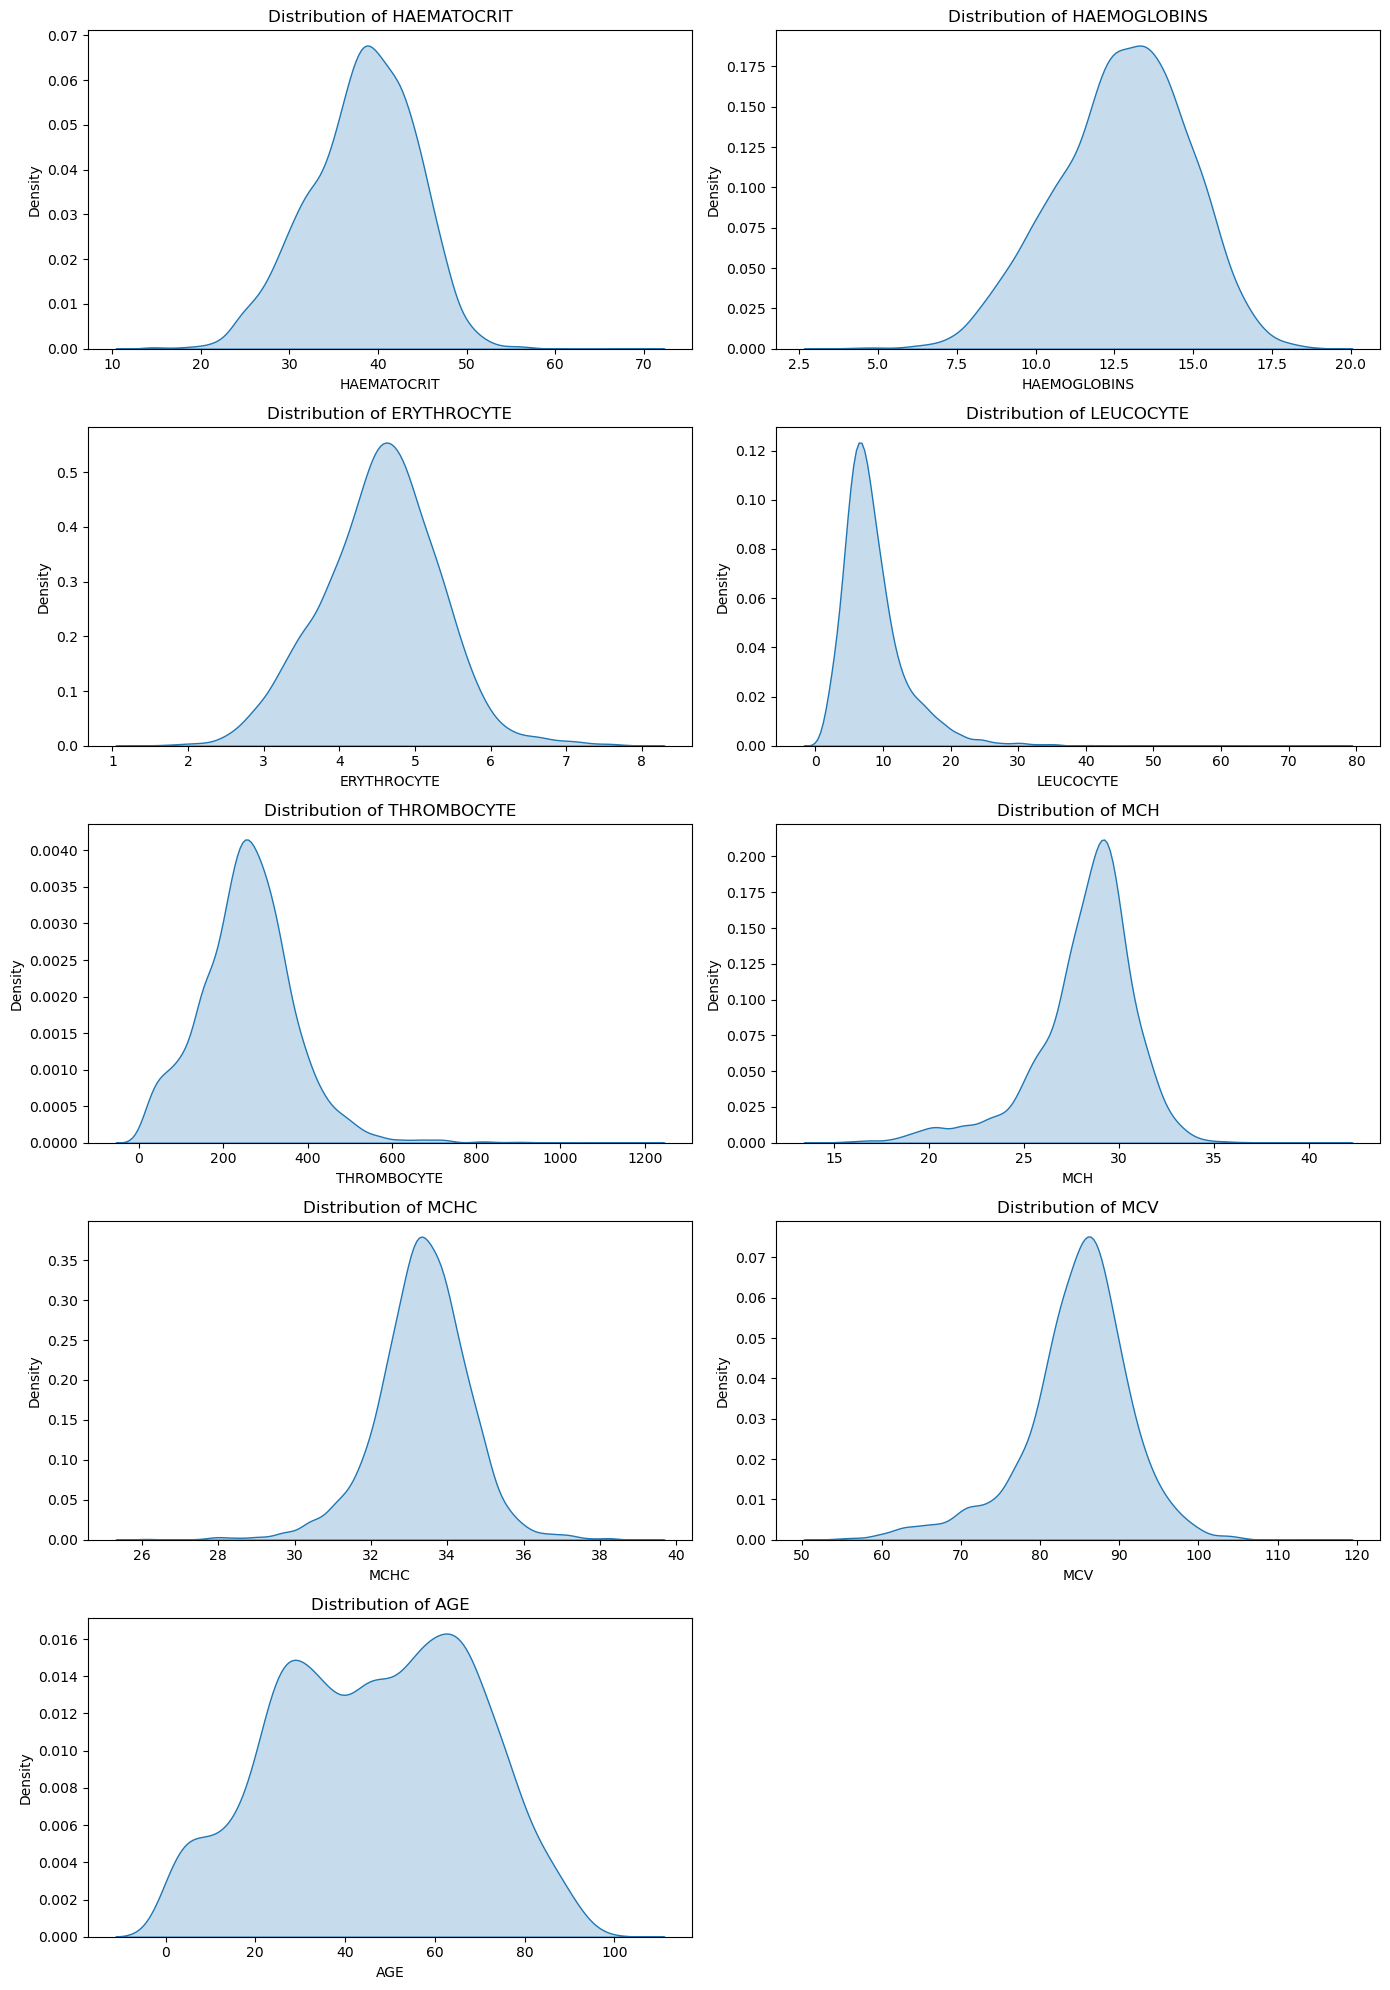

In [244]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical features you want to plot
features = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
            'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE']

# Create a grid of KDE plots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.kdeplot(data=df, x=feature, ax=axes[i], shade=True)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

# Remove the last empty subplot if necessary
if len(features) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()
plt.show()


##### as we can see most of our data is somwhat normal distribution except the leucocyte , thrombocyte, mcv,mch , so a log transformatiom might help


In [245]:


# Function to detect outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Function to calculate percentage of outliers in each column
def calculate_outlier_percentage(df):
    outlier_percentages = {}
    for column in df.columns:
        if df[column].dtype in [int, float]:  # Only consider numerical columns
            outliers = detect_outliers_iqr(df, column)
            outlier_percentage = (len(outliers) / len(df)) * 100
            outlier_percentages[column] = outlier_percentage
    return outlier_percentages


# Calculate outlier percentages
outlier_percentages = calculate_outlier_percentage(df)

# Display the results
for column, percentage in outlier_percentages.items():
    print(f'Column: {column}, Outlier Percentage: {percentage:.2f}%')


Column: HAEMATOCRIT, Outlier Percentage: 0.68%
Column: HAEMOGLOBINS, Outlier Percentage: 0.50%
Column: ERYTHROCYTE, Outlier Percentage: 1.47%
Column: LEUCOCYTE, Outlier Percentage: 5.83%
Column: MCH, Outlier Percentage: 6.12%
Column: MCHC, Outlier Percentage: 3.63%
Column: MCV, Outlier Percentage: 5.39%


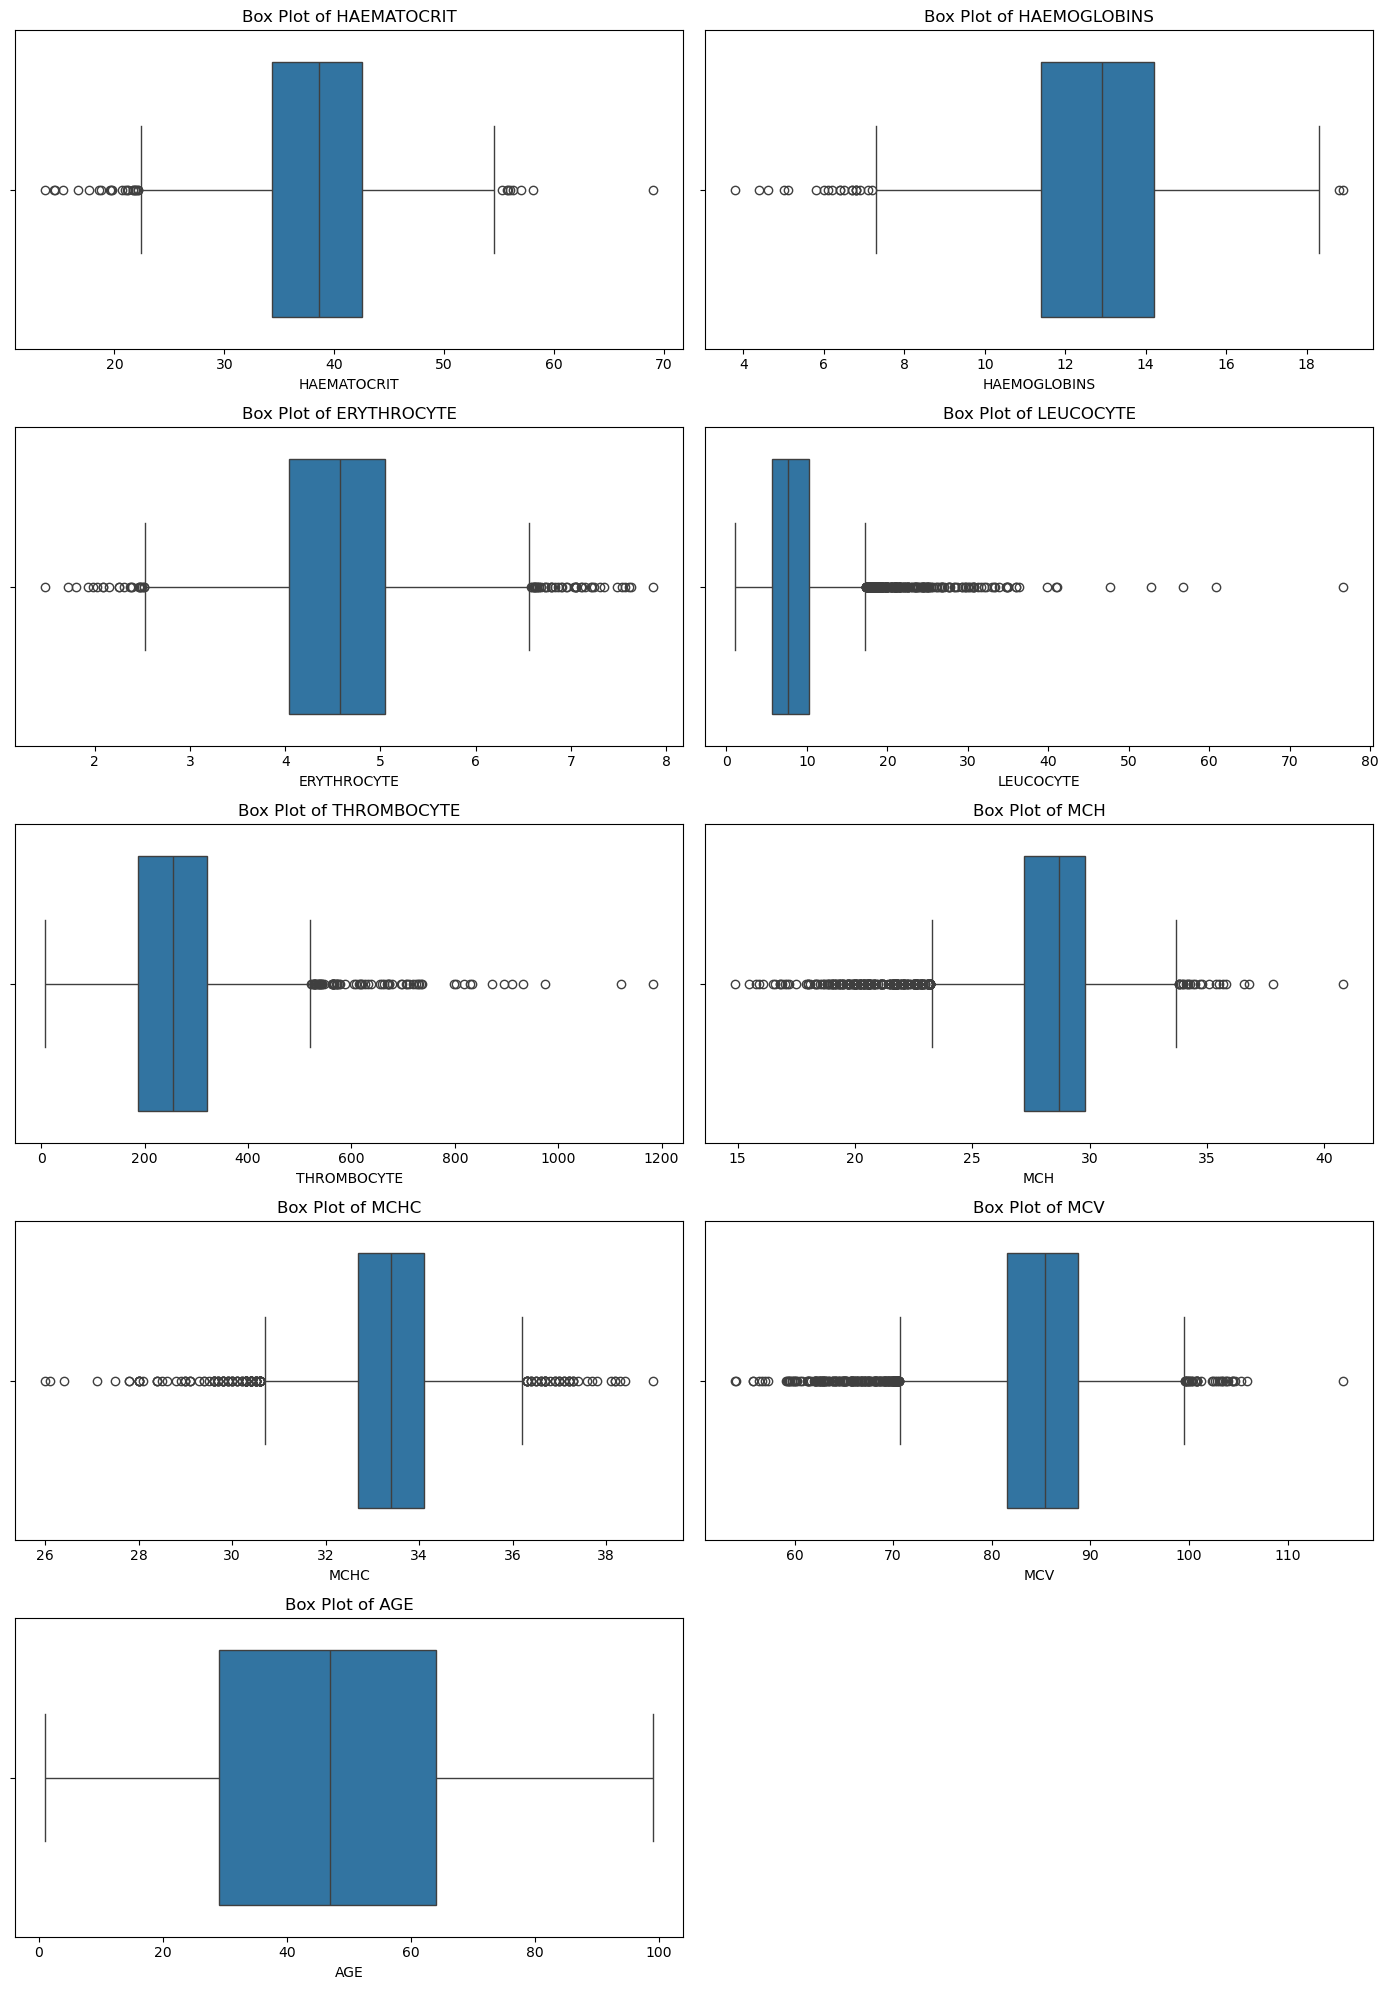

In [272]:
import seaborn as sns

import matplotlib.pyplot as plt

# List of numerical features you want to plot
numerical_features = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
                      'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE']

# Create a grid of box plots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_xlabel(feature)

# Remove the last empty subplot if necessary
if len(numerical_features) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()
plt.show()

#### as this is a health dataset we cannot remove the outliers as they are important for the analysis as we can see.

## Feature enginering

#### Encoding categorical to numerical ones

In [246]:
df['SEX_ENCODED'] = df['SEX'].map({'M': 1, 'F': 0})
df["SOURCE_ENCODED"] = df["SOURCE"].map({'in': 1, 'out': 0})
df.drop(columns=['SEX', 'SOURCE'], inplace=True)
df.head()

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         35.1          11.8         4.65        6.3          310  25.4  33.6   
1         43.5          14.8         5.39       12.7          334  27.5  34.0   
2         33.5          11.3         4.74       13.2          305  23.8  33.7   
3         39.1          13.7         4.98       10.5          366  27.5  35.0   
4         30.9           9.9         4.23       22.1          333  23.4  32.0   

    MCV  AGE  SEX_ENCODED  SOURCE_ENCODED  
0  75.5    1            0               0  
1  80.7    1            0               0  
2  70.7    1            0               0  
3  78.5    1            0               0  
4  73.0    1            1               0

In [247]:
df.head()

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         35.1          11.8         4.65        6.3          310  25.4  33.6   
1         43.5          14.8         5.39       12.7          334  27.5  34.0   
2         33.5          11.3         4.74       13.2          305  23.8  33.7   
3         39.1          13.7         4.98       10.5          366  27.5  35.0   
4         30.9           9.9         4.23       22.1          333  23.4  32.0   

    MCV  AGE  SEX_ENCODED  SOURCE_ENCODED  
0  75.5    1            0               0  
1  80.7    1            0               0  
2  70.7    1            0               0  
3  78.5    1            0               0  
4  73.0    1            1               0

### correlation matrix

In [248]:
corr=df.corr()['SOURCE_ENCODED'].sort_values(ascending=False)
corr

SOURCE_ENCODED    1.000000
LEUCOCYTE         0.137359
AGE               0.109533
SEX_ENCODED       0.051795
MCHC              0.017711
MCH              -0.013308
MCV              -0.022524
ERYTHROCYTE      -0.232001
THROMBOCYTE      -0.243202
HAEMOGLOBINS     -0.255793
HAEMATOCRIT      -0.271190
Name: SOURCE_ENCODED, dtype: float64

<Axes: >

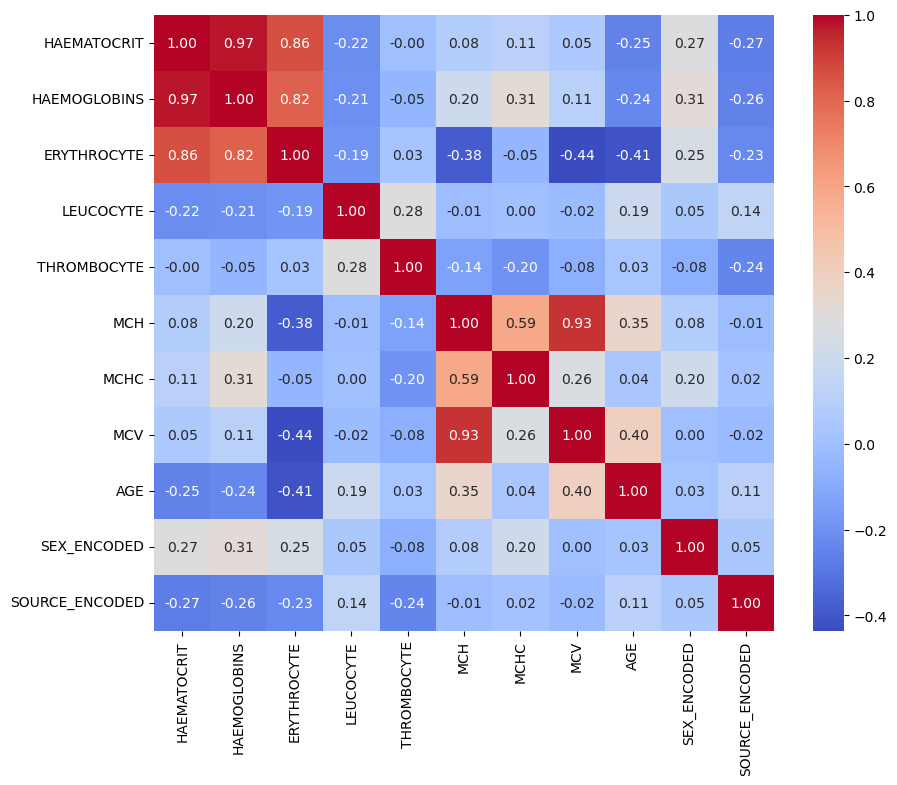

In [249]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


In [250]:
df['THROMBOCYTE_LEUCOCYTE_RATIO'] = df['THROMBOCYTE'] / (df['LEUCOCYTE'] + 1e-6) # feature engineering
df['ERYTHROCYTE_LEUCOCYTE'] = df['ERYTHROCYTE'] * df['LEUCOCYTE']

print(df.head())

   HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         35.1          11.8         4.65        6.3          310  25.4  33.6   
1         43.5          14.8         5.39       12.7          334  27.5  34.0   
2         33.5          11.3         4.74       13.2          305  23.8  33.7   
3         39.1          13.7         4.98       10.5          366  27.5  35.0   
4         30.9           9.9         4.23       22.1          333  23.4  32.0   

    MCV  AGE  SEX_ENCODED  SOURCE_ENCODED  THROMBOCYTE_LEUCOCYTE_RATIO  \
0  75.5    1            0               0                    49.206341   
1  80.7    1            0               0                    26.299211   
2  70.7    1            0               0                    23.106059   
3  78.5    1            0               0                    34.857140   
4  73.0    1            1               0                    15.067873   

   ERYTHROCYTE_LEUCOCYTE  
0                 29.295  
1             

In [251]:
df.head()

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         35.1          11.8         4.65        6.3          310  25.4  33.6   
1         43.5          14.8         5.39       12.7          334  27.5  34.0   
2         33.5          11.3         4.74       13.2          305  23.8  33.7   
3         39.1          13.7         4.98       10.5          366  27.5  35.0   
4         30.9           9.9         4.23       22.1          333  23.4  32.0   

    MCV  AGE  SEX_ENCODED  SOURCE_ENCODED  THROMBOCYTE_LEUCOCYTE_RATIO  \
0  75.5    1            0               0                    49.206341   
1  80.7    1            0               0                    26.299211   
2  70.7    1            0               0                    23.106059   
3  78.5    1            0               0                    34.857140   
4  73.0    1            1               0                    15.067873   

   ERYTHROCYTE_LEUCOCYTE  
0                 29.295  
1                 68.453  
2                 62.568  
3                 52.290  
4                 93.483

#### splitting the dataset

In [252]:
X = df.drop(columns=['SOURCE_ENCODED'])
y = df['SOURCE_ENCODED']

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [254]:
X_train

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  \
1309         38.8          12.7         4.48        4.3          190  28.3   
3124         24.4           8.4         2.90       10.1          197  29.0   
3035         39.1          12.2         4.55        8.2          250  26.8   
1106         32.8          10.7         3.69        7.5          315  29.0   
3054         42.3          14.5         4.77        5.4          265  30.4   
...           ...           ...          ...        ...          ...   ...   
3906         27.5           9.2         3.13       12.3          135  29.4   
2732         34.3          11.4         3.88       19.8          225  29.4   
3231         46.0          15.2         5.44        4.0          162  27.9   
3628         39.7          13.0         4.66        9.2          238  27.9   
3377         24.4           8.1         2.82       19.8          350  28.7   

      MCHC   MCV  AGE  SEX_ENCODED  THROMBOCYTE_LEUCOCYTE_RATIO  \
1309  32.7  86.6   32            0                    44.186036   
3124  34.4  84.1   62            0                    19.504949   
3035  31.2  85.9   60            0                    30.487801   
1106  32.6  88.9   29            0                    41.999994   
3054  34.3  88.7   61            1                    49.074065   
...    ...   ...  ...          ...                          ...   
3906  33.5  87.9   73            1                    10.975609   
2732  33.2  88.4   56            0                    11.363636   
3231  33.0  84.6   63            0                    40.499990   
3628  32.7  85.2   68            0                    25.869562   
3377  33.2  86.5   65            0                    17.676767   

      ERYTHROCYTE_LEUCOCYTE  
1309                 19.264  
3124                 29.290  
3035                 37.310  
1106                 27.675  
3054                 25.758  
...                     ...  
3906                 38.499  
2732                 76.824  
3231                 21.760  
3628                 42.872  
3377                 55.836  

[3529 rows x 12 columns]

#### apply robustscaling to the data

In [255]:
features_to_scale = X_train.columns.tolist()
scaler = RobustScaler()
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])


print(X_train.head())



      HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  \
1309     0.012346     -0.071429    -0.089109  -0.702128    -0.496241   
3124    -1.765432     -1.607143    -1.653465   0.531915    -0.443609   
3035     0.049383     -0.250000    -0.019802   0.127660    -0.045113   
1106    -0.728395     -0.785714    -0.871287  -0.021277     0.443609   
3054     0.444444      0.571429     0.198020  -0.468085     0.067669   

           MCH      MCHC       MCV       AGE  SEX_ENCODED  \
1309 -0.148148 -0.500000  0.164384 -0.428571         -1.0   
3124  0.111111  0.714286 -0.178082  0.428571         -1.0   
3035 -0.703704 -1.571429  0.068493  0.371429         -1.0   
1106  0.111111 -0.571429  0.479452 -0.514286         -1.0   
3054  0.629630  0.642857  0.452055  0.400000          0.0   

      THROMBOCYTE_LEUCOCYTE_RATIO  ERYTHROCYTE_LEUCOCYTE  
1309                     0.486089              -0.680366  
3124                    -0.624171              -0.230528  
3035                   

## creating model 

In [256]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score


In [257]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

# Store results in a DataFrame
results = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy', 'ROC AUC', 'Precision'])

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred_prob)
    precision = precision_score(y_test, y_test_pred)
    
    # Append results to the DataFrame
    results = pd.concat([results, pd.DataFrame({
        'Model': [model_name],
        'Train Accuracy': [train_accuracy],
        'Test Accuracy': [test_accuracy],
        'ROC AUC': [roc_auc],
        'Precision': [precision]
    })], ignore_index=True)

print(results.sort_values('Test Accuracy', ascending=False))

C:\Users\ranja\AppData\Local\Temp\ipykernel_19788\2846327669.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({
c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 1427, number of negative: 2102
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2209
[LightGBM] [Info] Number of data points in the train set: 3529, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.404364 -> initscore=-0.387315
[LightGBM] [Info] Start training from score -0.387315


c:\Users\ranja\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


                    Model  Train Accuracy  Test Accuracy   ROC AUC  Precision
3           Random Forest        1.000000       0.758777  0.802891   0.736842
5                CatBoost        0.871918       0.753114  0.815243   0.730897
6                LightGBM        0.929442       0.745187  0.812714   0.710191
4                 XGBoost        0.986682       0.744054  0.805828   0.701538
7                AdaBoost        0.755738       0.740657  0.785259   0.722222
2  Support Vector Machine        0.767923       0.736127  0.792427   0.738462
1     K-Nearest Neighbors        0.803060       0.720272  0.749779   0.667683
0     Logistic Regression        0.728252       0.714609  0.748256   0.696629


## Hypertuning top 4 models using hyperopt

### xgboost

In [258]:
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK, STATUS_FAIL
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

np.seterr(under='ignore')

def objective_xgb(params):
    try:
        params['n_estimators'] = int(params['n_estimators'])
        params['max_depth'] = int(params['max_depth'])
        model = XGBClassifier(**params, use_label_encoder=False, eval_metric='logloss', random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        return {'loss': -accuracy, 'status': STATUS_OK}
    except Exception as e:
        return {'loss': float('inf'), 'status': STATUS_FAIL, 'exception': str(e)}

space_xgb = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 10),
    'max_depth': hp.quniform('max_depth', 3, 15, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'subsample': hp.uniform('subsample', 0.5, 1)
}

trials_xgb = Trials()
best_xgb = fmin(fn=objective_xgb, space=space_xgb, algo=tpe.suggest, max_evals=50, trials=trials_xgb)
print("Best parameters for XGBoost:", best_xgb)


  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



  2%|▏         | 1/50 [00:00<00:19,  2.54trial/s, best loss: -0.7576443941109853]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



  8%|▊         | 4/50 [00:00<00:10,  4.51trial/s, best loss: -0.7610419026047565]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 12%|█▏        | 6/50 [00:01<00:09,  4.67trial/s, best loss: -0.7610419026047565]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 16%|█▌        | 8/50 [00:01<00:08,  4.74trial/s, best loss: -0.7610419026047565]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 20%|██        | 10/50 [00:02<00:08,  4.75trial/s, best loss: -0.7610419026047565]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 24%|██▍       | 12/50 [00:02<00:07,  5.39trial/s, best loss: -0.7610419026047565]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 26%|██▌       | 13/50 [00:03<00:10,  3.49trial/s, best loss: -0.7610419026047565]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 28%|██▊       | 14/50 [00:03<00:09,  3.61trial/s, best loss: -0.7644394110985278]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 30%|███       | 15/50 [00:03<00:09,  3.51trial/s, best loss: -0.7644394110985278]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 32%|███▏      | 16/50 [00:03<00:08,  3.81trial/s, best loss: -0.7644394110985278]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 36%|███▌      | 18/50 [00:04<00:09,  3.22trial/s, best loss: -0.766704416761042] 

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 38%|███▊      | 19/50 [00:05<00:13,  2.28trial/s, best loss: -0.7712344280860702]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 40%|████      | 20/50 [00:05<00:11,  2.51trial/s, best loss: -0.7712344280860702]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 42%|████▏     | 21/50 [00:06<00:13,  2.13trial/s, best loss: -0.7712344280860702]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 44%|████▍     | 22/50 [00:06<00:14,  2.00trial/s, best loss: -0.7712344280860702]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 46%|████▌     | 23/50 [00:07<00:15,  1.78trial/s, best loss: -0.7712344280860702]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 48%|████▊     | 24/50 [00:08<00:14,  1.80trial/s, best loss: -0.7712344280860702]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 50%|█████     | 25/50 [00:08<00:14,  1.77trial/s, best loss: -0.7712344280860702]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 52%|█████▏    | 26/50 [00:09<00:12,  1.93trial/s, best loss: -0.7712344280860702]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 54%|█████▍    | 27/50 [00:10<00:15,  1.50trial/s, best loss: -0.7712344280860702]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 56%|█████▌    | 28/50 [00:11<00:16,  1.34trial/s, best loss: -0.7712344280860702]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 58%|█████▊    | 29/50 [00:11<00:13,  1.51trial/s, best loss: -0.7712344280860702]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 60%|██████    | 30/50 [00:12<00:12,  1.58trial/s, best loss: -0.7712344280860702]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 62%|██████▏   | 31/50 [00:12<00:11,  1.64trial/s, best loss: -0.7712344280860702]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 64%|██████▍   | 32/50 [00:13<00:13,  1.38trial/s, best loss: -0.7712344280860702]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:19:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 66%|██████▌   | 33/50 [00:14<00:14,  1.18trial/s, best loss: -0.7712344280860702]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:19:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 68%|██████▊   | 34/50 [00:15<00:12,  1.23trial/s, best loss: -0.7712344280860702]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:19:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 70%|███████   | 35/50 [00:16<00:11,  1.29trial/s, best loss: -0.7712344280860702]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:19:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 72%|███████▏  | 36/50 [00:18<00:16,  1.21s/trial, best loss: -0.7712344280860702]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:19:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 74%|███████▍  | 37/50 [00:19<00:14,  1.10s/trial, best loss: -0.7712344280860702]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:19:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 76%|███████▌  | 38/50 [00:20<00:12,  1.06s/trial, best loss: -0.7712344280860702]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:19:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 78%|███████▊  | 39/50 [00:20<00:09,  1.10trial/s, best loss: -0.7712344280860702]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:19:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 80%|████████  | 40/50 [00:21<00:07,  1.29trial/s, best loss: -0.7712344280860702]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:19:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 82%|████████▏ | 41/50 [00:22<00:07,  1.28trial/s, best loss: -0.7712344280860702]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:19:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 86%|████████▌ | 43/50 [00:23<00:04,  1.56trial/s, best loss: -0.7712344280860702]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:19:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:19:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 88%|████████▊ | 44/50 [00:23<00:03,  1.67trial/s, best loss: -0.7712344280860702]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:19:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 90%|█████████ | 45/50 [00:24<00:02,  1.84trial/s, best loss: -0.7712344280860702]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:19:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 92%|█████████▏| 46/50 [00:24<00:02,  1.81trial/s, best loss: -0.7712344280860702]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:19:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 94%|█████████▍| 47/50 [00:25<00:01,  1.72trial/s, best loss: -0.7712344280860702]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:19:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 98%|█████████▊| 49/50 [00:26<00:00,  2.22trial/s, best loss: -0.7712344280860702]

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:19:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:19:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



100%|██████████| 50/50 [00:26<00:00,  1.88trial/s, best loss: -0.7712344280860702]
Best parameters for XGBoost: {'colsample_bytree': 0.5801635295091719, 'learning_rate': 0.01817887438206076, 'max_depth': 12.0, 'n_estimators': 270.0, 'subsample': 0.6133636302783425}


### ***Best parameters for XGBoost:*** {'colsample_bytree': 0.5801635295091719, 'learning_rate': 0.01817887438206076, 'max_depth': 12.0, 'n_estimators': 270.0, 'subsample': 0.6133636302783425}

### LIGHTLGB

In [259]:
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK, STATUS_FAIL
import lightgbm as lgb
from sklearn.metrics import accuracy_score

np.seterr(under='ignore')

def objective_lgb(params):
    try:
        params['n_estimators'] = int(params['n_estimators'])
        params['max_depth'] = int(params['max_depth'])
        params['num_leaves'] = int(params['num_leaves'])
        model = lgb.LGBMClassifier(**params, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        return {'loss': -accuracy, 'status': STATUS_OK}
    except Exception as e:
        return {'loss': float('inf'), 'status': STATUS_FAIL, 'exception': str(e)}

space_lgb = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 10),
    'max_depth': hp.quniform('max_depth', 3, 15, 1),
    'num_leaves': hp.quniform('num_leaves', 20, 150, 10),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'subsample': hp.uniform('subsample', 0.5, 1)
}

trials_lgb = Trials()
best_lgb = fmin(fn=objective_lgb, space=space_lgb, algo=tpe.suggest, max_evals=50, trials=trials_lgb)
print("Best parameters for LightGBM:", best_lgb)

[LightGBM] [Info] Number of positive: 1427, number of negative: 2102
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2209                     
[LightGBM] [Info] Number of data points in the train set: 3529, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.404364 -> initscore=-0.387315
[LightGBM] [Info] Start training from score -0.387315 
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 1427, number of negative: 2102             
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000244 seconds.
Y

### **Best parameters for LightGBM:** {'colsample_bytree': 0.695839855929211, 'learning_rate': 0.03696281485402076, 'max_depth': 7.0, 'n_estimators': 170.0, 'num_leaves': 50.0, 'subsample': 0.8488297434581893}

### random forest

In [260]:
from sklearn.ensemble import RandomForestClassifier
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK
from sklearn.metrics import accuracy_score

np.seterr(under='ignore')

def objective_rf(params):
    # Convert parameters to integers
    params['n_estimators'] = int(params['n_estimators'])
    params['max_depth'] = int(params['max_depth'])
    params['min_samples_split'] = int(params['min_samples_split'])
    params['min_samples_leaf'] = int(params['min_samples_leaf'])
    
    model = RandomForestClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return {'loss': -accuracy, 'status': STATUS_OK}

space_rf = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 10),
    'max_depth': hp.quniform('max_depth', 3, 15, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 10, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 10, 1)
}

trials_rf = Trials()
best_rf = fmin(fn=objective_rf, space=space_rf, algo=tpe.suggest, max_evals=50, trials=trials_rf)
print("Best parameters for Random Forest:", best_rf)

100%|██████████| 50/50 [00:59<00:00,  1.18s/trial, best loss: -0.766704416761042] 
Best parameters for Random Forest: {'max_depth': 14.0, 'min_samples_leaf': 3.0, 'min_samples_split': 6.0, 'n_estimators': 260.0}


### **Best parameters for Random Forest:** {'max_depth': 14.0, 'min_samples_leaf': 3.0, 'min_samples_split': 6.0, 'n_estimators': 260.0}

### catboost

In [261]:
from catboost import CatBoostClassifier
np.seterr(under='ignore')
def objective_cat(params):
    model = CatBoostClassifier(**params, random_state=42, verbose=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return {'loss': -accuracy, 'status': STATUS_OK}

space_cat = {
    'iterations': hp.quniform('iterations', 50, 300, 10),
    'depth': hp.quniform('depth', 3, 15, 1),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),
    'l2_leaf_reg': hp.uniform('l2_leaf_reg', 1, 10)
}

trials_cat = Trials()
best_cat = fmin(fn=objective_cat, space=space_cat, algo=tpe.suggest, max_evals=50, trials=trials_cat)
print("Best parameters for CatBoost:", best_cat)


100%|██████████| 50/50 [10:54<00:00, 13.10s/trial, best loss: -0.766704416761042] 
Best parameters for CatBoost: {'depth': 10.0, 'iterations': 170.0, 'l2_leaf_reg': 9.847121567366113, 'learning_rate': 0.34923945948803387}


### ***Best parameters for CatBoost:*** {'depth': 10.0, 'iterations': 170.0, 'l2_leaf_reg': 9.847121567366113, 'learning_rate': 0.34923945948803387}

### results

In [269]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score
import pandas as pd
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
import lightgbm as lgb
from IPython.display import display

tuned_results = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy', 'ROC AUC', 'Precision'])

def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_pred_prob = model.predict_proba(X_test)[:, 1]
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred_prob)
    precision = precision_score(y_test, y_test_pred)
    return pd.Series({
        'Model': model_name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'ROC AUC': roc_auc,
        'Precision': precision
    })

# Convert hyperparameters to appropriate types
best_xgb = {k: int(v) if k in ['n_estimators', 'max_depth'] else v for k, v in best_xgb.items()}
best_rf = {k: int(v) if k in ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf'] else v for k, v in best_rf.items()}
best_cat = {k: int(v) if k in ['depth'] else v for k, v in best_cat.items()}
best_lgb = {k: int(v) if k in ['num_leaves', 'max_depth', 'n_estimators'] else v for k, v in best_lgb.items()}

# Evaluate and store results for each tuned model
tuned_results = pd.concat([tuned_results, evaluate_model(XGBClassifier(**best_xgb, use_label_encoder=False, eval_metric='logloss', random_state=42), 'Tuned XGBoost').to_frame().T], ignore_index=True)
tuned_results = pd.concat([tuned_results, evaluate_model(RandomForestClassifier(**best_rf, random_state=42), 'Tuned Random Forest').to_frame().T], ignore_index=True)
tuned_results = pd.concat([tuned_results, evaluate_model(CatBoostClassifier(**best_cat, random_state=42, verbose=0), 'Tuned CatBoost').to_frame().T], ignore_index=True)
tuned_results = pd.concat([tuned_results, evaluate_model(lgb.LGBMClassifier(**best_lgb, random_state=42), 'Tuned LightGBM').to_frame().T], ignore_index=True)

# Display the results in a table format
tuned_results

c:\Users\ranja\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:46:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 1427, number of negative: 2102
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000709 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2209
[LightGBM] [Info] Number of data points in the train set: 3529, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.404364 -> initscore=-0.387315
[LightGBM] [Info] Start training from score -0.387315
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

Model Train Accuracy Test Accuracy   ROC AUC Precision
0        Tuned XGBoost       0.965713      0.771234  0.812692  0.755776
1  Tuned Random Forest        0.91669      0.766704  0.811904  0.755932
2       Tuned CatBoost       0.914707      0.766704  0.805013  0.744337
3       Tuned LightGBM       0.881836      0.773499  0.814918  0.757377

#### feature selection

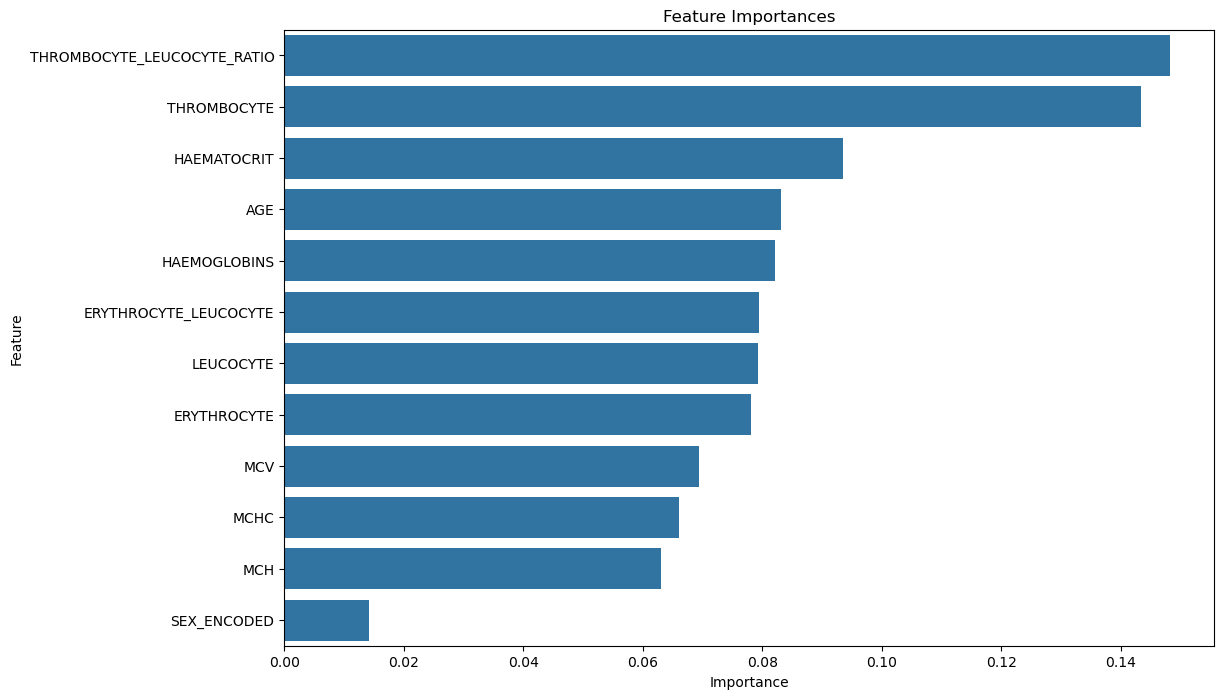

In [266]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

# Train a Random Forest model to get feature importances
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()



### FINAL MODEL

[LightGBM] [Info] Number of positive: 1427, number of negative: 2102
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2209
[LightGBM] [Info] Number of data points in the train set: 3529, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.404364 -> initscore=-0.387315
[LightGBM] [Info] Start training from score -0.387315
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

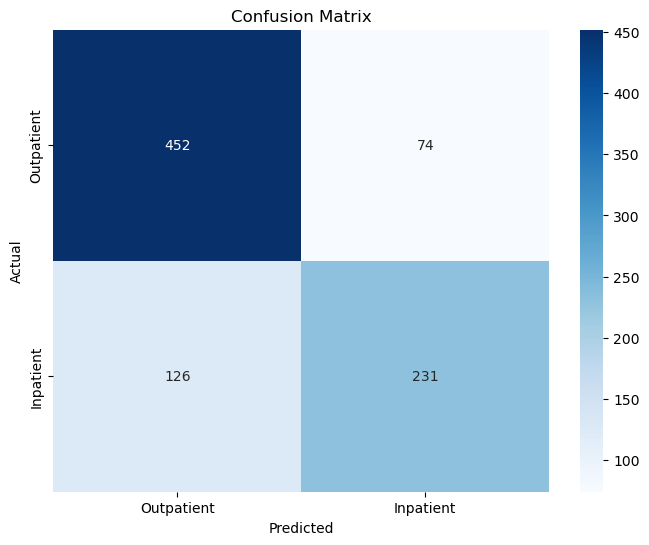

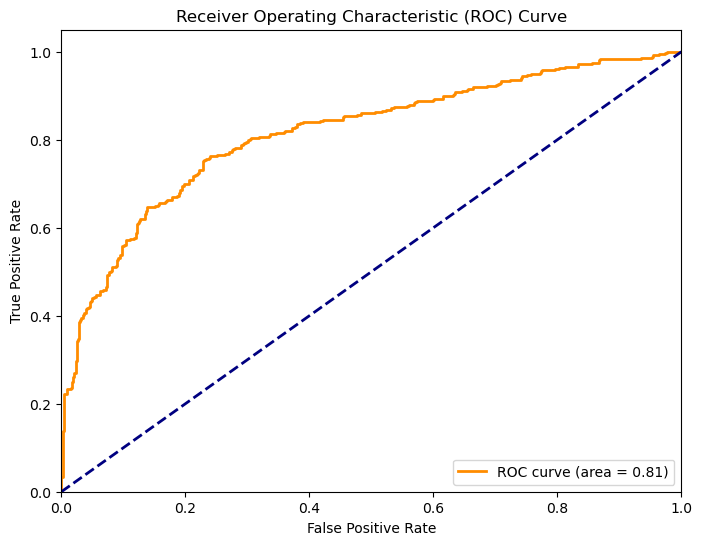

In [270]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import lightgbm as lgb

import matplotlib.pyplot as plt

# Define the final LightGBM model with the provided parameters
final_lgb_model = lgb.LGBMClassifier(
    colsample_bytree=0.695839855929211,
    learning_rate=0.03696281485402076,
    max_depth=int(7.0),
    n_estimators=int(170.0),
    num_leaves=int(50.0),
    subsample=0.8488297434581893,
    random_state=42
)

# Train the final model
final_lgb_model.fit(X_train, y_train)

# Predictions
y_train_pred = final_lgb_model.predict(X_train)
y_test_pred = final_lgb_model.predict(X_test)
y_test_pred_prob = final_lgb_model.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Outpatient', 'Inpatient'], yticklabels=['Outpatient', 'Inpatient'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## PIPELINE WITH ALL MODELS

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK, STATUS_FAIL
import joblib

import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r"C:\Users\ranja\OneDrive\Documents\upgrad\capstone\docassist\data\data(before).csv")

# Data preprocessing
df['SEX_ENCODED'] = df['SEX'].map({'M': 1, 'F': 0})
df["SOURCE_ENCODED"] = df["SOURCE"].map({'in': 1, 'out': 0})
df.drop(columns=['SEX', 'SOURCE'], inplace=True)

# Feature engineering
df['THROMBOCYTE_LEUCOCYTE_RATIO'] = df['THROMBOCYTE'] / (df['LEUCOCYTE'] + 1e-6)
df['ERYTHROCYTE_LEUCOCYTE'] = df['ERYTHROCYTE'] * df['LEUCOCYTE']

# Split data
X = df.drop(columns=['SOURCE_ENCODED'])
y = df['SOURCE_ENCODED']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling
features_to_scale = X_train.columns.tolist()
scaler = RobustScaler()
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

# Define models
models = {
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0)
}

# Hyperparameter tuning functions
def objective_xgb(params):
    try:
        params['n_estimators'] = int(params['n_estimators'])
        params['max_depth'] = int(params['max_depth'])
        model = XGBClassifier(**params, use_label_encoder=False, eval_metric='logloss', random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        return {'loss': -accuracy, 'status': STATUS_OK}
    except Exception as e:
        return {'loss': float('inf'), 'status': STATUS_FAIL, 'exception': str(e)}

def objective_lgb(params):
    try:
        params['n_estimators'] = int(params['n_estimators'])
        params['max_depth'] = int(params['max_depth'])
        params['num_leaves'] = int(params['num_leaves'])
        model = LGBMClassifier(**params, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        return {'loss': -accuracy, 'status': STATUS_OK}
    except Exception as e:
        return {'loss': float('inf'), 'status': STATUS_FAIL, 'exception': str(e)}

def objective_rf(params):
    params['n_estimators'] = int(params['n_estimators'])
    params['max_depth'] = int(params['max_depth'])
    params['min_samples_split'] = int(params['min_samples_split'])
    params['min_samples_leaf'] = int(params['min_samples_leaf'])
    model = RandomForestClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return {'loss': -accuracy, 'status': STATUS_OK}

def objective_cat(params):
    model = CatBoostClassifier(**params, random_state=42, verbose=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return {'loss': -accuracy, 'status': STATUS_OK}

# Hyperparameter spaces
space_xgb = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 10),
    'max_depth': hp.quniform('max_depth', 3, 15, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'subsample': hp.uniform('subsample', 0.5, 1)
}

space_lgb = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 10),
    'max_depth': hp.quniform('max_depth', 3, 15, 1),
    'num_leaves': hp.quniform('num_leaves', 20, 150, 10),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'subsample': hp.uniform('subsample', 0.5, 1)
}

space_rf = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 10),
    'max_depth': hp.quniform('max_depth', 3, 15, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 10, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 10, 1)
}

space_cat = {
    'iterations': hp.quniform('iterations', 50, 300, 10),
    'depth': hp.quniform('depth', 3, 15, 1),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),
    'l2_leaf_reg': hp.uniform('l2_leaf_reg', 1, 10)
}

# Hyperparameter tuning
trials_xgb = Trials()
best_xgb = fmin(fn=objective_xgb, space=space_xgb, algo=tpe.suggest, max_evals=50, trials=trials_xgb)

trials_lgb = Trials()
best_lgb = fmin(fn=objective_lgb, space=space_lgb, algo=tpe.suggest, max_evals=50, trials=trials_lgb)

trials_rf = Trials()
best_rf = fmin(fn=objective_rf, space=space_rf, algo=tpe.suggest, max_evals=50, trials=trials_rf)

trials_cat = Trials()
best_cat = fmin(fn=objective_cat, space=space_cat, algo=tpe.suggest, max_evals=50, trials=trials_cat)

# Convert hyperparameters to appropriate types
best_xgb = {k: int(v) if k in ['n_estimators', 'max_depth'] else v for k, v in best_xgb.items()}
best_rf = {k: int(v) if k in ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf'] else v for k, v in best_rf.items()}
best_cat = {k: int(v) if k in ['depth'] else v for k, v in best_cat.items()}
best_lgb = {k: int(v) if k in ['num_leaves', 'max_depth', 'n_estimators'] else v for k, v in best_lgb.items()}

# Evaluate models
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_pred_prob = model.predict_proba(X_test)[:, 1]
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred_prob)
    precision = precision_score(y_test, y_test_pred)
    return pd.Series({
        'Model': model_name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'ROC AUC': roc_auc,
        'Precision': precision
    })

tuned_results = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy', 'ROC AUC', 'Precision'])
tuned_results = pd.concat([tuned_results, evaluate_model(XGBClassifier(**best_xgb, use_label_encoder=False, eval_metric='logloss', random_state=42), 'Tuned XGBoost').to_frame().T], ignore_index=True)
tuned_results = pd.concat([tuned_results, evaluate_model(RandomForestClassifier(**best_rf, random_state=42), 'Tuned Random Forest').to_frame().T], ignore_index=True)
tuned_results = pd.concat([tuned_results, evaluate_model(CatBoostClassifier(**best_cat, random_state=42, verbose=0), 'Tuned CatBoost').to_frame().T], ignore_index=True)
tuned_results = pd.concat([tuned_results, evaluate_model(LGBMClassifier(**best_lgb, random_state=42), 'Tuned LightGBM').to_frame().T], ignore_index=True)

# Display the results
print(tuned_results.sort_values('Test Accuracy', ascending=False))

# Final model training and evaluation
final_model = LGBMClassifier(**best_lgb, random_state=42)
final_model.fit(X_train, y_train)
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)
y_test_pred_prob = final_model.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Outpatient', 'Inpatient'], yticklabels=['Outpatient', 'Inpatient'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#### pipeline with only the best lightlgb 

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       526
           1       0.76      0.62      0.68       357

    accuracy                           0.77       883
   macro avg       0.76      0.74      0.75       883
weighted avg       0.76      0.77      0.76       883



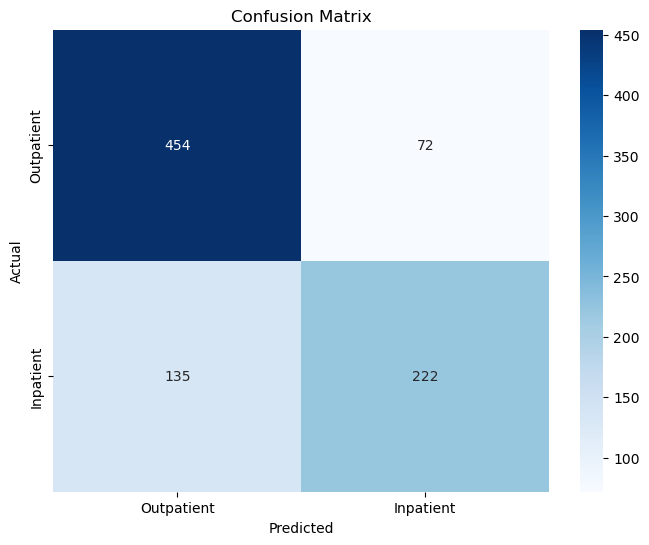

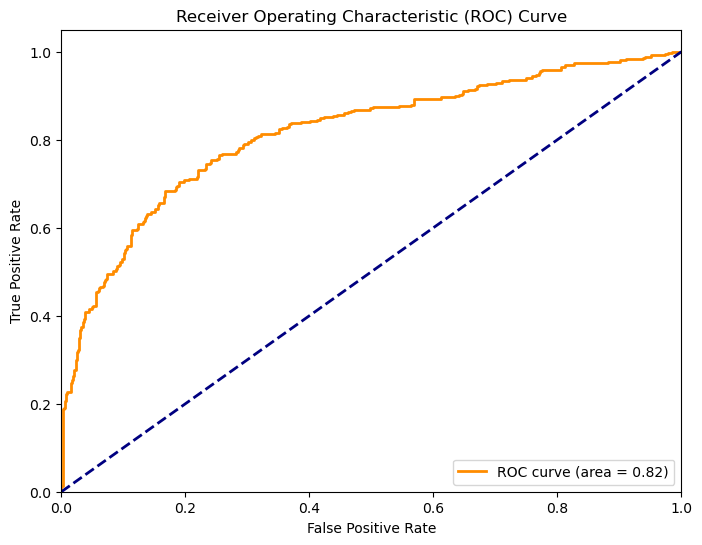

Model saved as 'final_model_pipeline.pkl'


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from lightgbm import LGBMClassifier
import joblib
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r"C:\Users\ranja\OneDrive\Documents\upgrad\capstone\DOCASSIST-AI\data\data(before).csv")

# Data preprocessing
df['SEX_ENCODED'] = df['SEX'].map({'M': 1, 'F': 0})
df["SOURCE_ENCODED"] = df["SOURCE"].map({'in': 1, 'out': 0})
df.drop(columns=['SEX', 'SOURCE'], inplace=True)

# Split data
X = df.drop(columns=['SOURCE_ENCODED'])
y = df['SOURCE_ENCODED']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature engineering function
def feature_engineering(df):
    df['THROMBOCYTE_LEUCOCYTE_RATIO'] = df['THROMBOCYTE'] / (df['LEUCOCYTE'] + 1e-6)
    df['ERYTHROCYTE_LEUCOCYTE'] = df['ERYTHROCYTE'] * df['LEUCOCYTE']
    return df

# Define the preprocessing and feature engineering pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), X_train.columns.tolist())
    ],
    remainder='passthrough'
)

feature_engineering_transformer = FunctionTransformer(feature_engineering, validate=False)

pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_transformer),
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(
        colsample_bytree=0.695839855929211,
        learning_rate=0.03696281485402076,
        max_depth=7,
        n_estimators=170,
        num_leaves=50,
        subsample=0.8488297434581893,
        random_state=42
    ))
])

# Train the final model
pipeline.fit(X_train, y_train)

# Predictions
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
y_test_pred_prob = pipeline.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Outpatient', 'Inpatient'], yticklabels=['Outpatient', 'Inpatient'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Save the final model
joblib.dump(pipeline, 'final_model_pipeline.pkl')
print("Model saved as 'final_model_pipeline.pkl'")

# Conclusion

## Summary
In this project, we developed an intelligent medical decision support system to assist doctors in making informed decisions about patient treatment options. By leveraging machine learning and data analysis, we aimed to provide personalized treatment recommendations based on patient data.

## Key Findings
1. **Data Analysis**:
    - The dataset contained various medical features such as HAEMATOCRIT, HAEMOGLOBINS, ERYTHROCYTE, LEUCOCYTE, THROMBOCYTE, MCH, MCHC, MCV, AGE, and SEX.
    - The target variable, SOURCE, indicated whether the patient was an inpatient or outpatient.

2. **Exploratory Data Analysis**:
    - The dataset had no missing or duplicate values.
    - There was a class imbalance in the target variable with approximately 59% outpatients and 41% inpatients.
    - The dataset had an equal distribution of male and female patients.

3. **Feature Engineering**:
    - Created new features such as THROMBOCYTE_LEUCOCYTE_RATIO and ERYTHROCYTE_LEUCOCYTE to enhance model performance.
    - Encoded categorical variables (SEX and SOURCE) into numerical ones.

4. **Model Training and Evaluation**:
    - Multiple machine learning models were trained, including Logistic Regression, K-Nearest Neighbors, Support Vector Machine, Random Forest, XGBoost, CatBoost, and LightGBM.
    - The models were evaluated based on metrics such as accuracy, ROC AUC, and precision.

5. **Hyperparameter Tuning**:
    - Hyperparameter tuning was performed using Hyperopt for the top models (XGBoost, LightGBM, Random Forest, and CatBoost) to optimize their performance.

6. **Final Model**:
    - The final model selected was LightGBM with the best hyperparameters.
    - The final model achieved a high accuracy and ROC AUC score, indicating its effectiveness in predicting patient treatment options.

## Results
- **Train Accuracy**: The final LightGBM model achieved a train accuracy of `88.18%`.
- **Test Accuracy**: The final LightGBM model achieved a test accuracy of `77.3499%`.
- **ROC AUC**: The final LightGBM model achieved a ROC AUC score of `81.4918`.
- **Precision**: The final LightGBM model achieved a precision score of `75.7377`.

## Conclusion
The intelligent medical decision support system developed in this project successfully analyzed patient data and provided accurate treatment recommendations. The final LightGBM model demonstrated high performance, making it a valuable tool for assisting doctors in clinical decision-making. Future work could involve integrating this system into real-world healthcare settings and continuously updating the model with new patient data to maintain its accuracy and relevance.

## Future Work
- **Integration**: Integrate the decision support system into healthcare systems for real-time usage.
- **Continuous Learning**: Continuously update the model with new patient data to improve its accuracy and adaptability.
- **Expand Features**: Incorporate additional medical features and patient data to enhance the model's predictive capabilities.
- **User Interface**: Develop a user-friendly interface for doctors to interact with the decision support system easily.

By leveraging advanced machine learning techniques, this project has the potential to significantly improve patient outcomes and support healthcare professionals in making data-driven decisions.

## **what i learnt from working on this model:**

#### 1.health dataset are tough to predict, here majority had outliers but if i had removed them there would be loss of data.so i avoided.
#### 2. for this to get nice accuracy and score vreating new features was a must. and that 1e-6 i found that some values were going null .
#### 3. the classimbalnce i tried to fix it but it was giving lot less accuracy so i ignored it . 
#### 4.still it was best

<div align="center">
------------------------------------------------END------------------------------------------------------
</div>